# Proyek Analisis Data: Sampel SuperStore
- Kelompok : Kelompok 5
- Anggota : </br>
10123231 - Frederick Agung Ezra Bandaso Jo</br>
10123246 - Amantha Moammar Radja</br>
10123247 - Zulfa Rula Febrian</br>
10123257 - Fazhrydzal Arya Pratama Sunandar</br>
10123260 - Ramdhan Husna A'liyasa

## Menentukan Pertanyaan Bisnis

- Bagaimana Total profit, total order, total penjualan dan rata rata diskon dari tahun ke tahun? - 10123247 - Zulfa Rula Febrian
- Apakah terdapat pola kenaikan atau penurunan transaksi yang signifikan ? 10123257 - Fazhrydzal Arya Pratama Sunandar
- Jika perusahaan ingin meningkatkan profit pada tahun berikutnya, produk mana yang sebaiknya difokuskan untuk peningkatan penjualan berdasarkan data tahun 2014? - 10123260 - Ramdhan Husna A'liyasa
- Apakah terdapat periode tertentu di mana profit cenderung stabil atau mengalami tren kenaikan/penurunan yang signifikan  berdasarkan data tahun 2014?  - 10123231 - Frederick Agung Ezra Bandaso Jo
- Seberapa sering terjadi hari dengan kerugian signifikan dalam sebulan pada tahun 2014? - 10123246 - Amantha Moammar Radja
- Jika perusahaan ingin mengurangi kerugian di tahun berikutnya, produk mana yang perlu mendapat perhatian lebih berdasarkan data tahun 2014? - 10123247 - Zulfa Rula Febrian
- Bagaimana distribusi kuantitas penjualan di seluruh negara bagian Amerika Serikat? - 10123247 - Zulfa Rula Febrian

## Menyiapkan semua library yang dibuthkan

In [113]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Gathering Data (Pengumpulan Data)
ini merupakan tahapan dalam pengumpulan data dari berbagai sumber, disini merupakan tahapan import dataset kedalam notebook

In [114]:
#Membuka dataset
df = pd.read_csv("Sample-SuperStore.csv")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Assessing Data (Penilaian Data)
ini merupakan tahapan untuk melakukan evaluasi data untuk mengidentifikasi masalah kualitas dan struktur data yang dapat mempengaruhi analisis dari mulai missing value, pencilan, ataupun tipe data yang tidak sesuai

In [115]:
print(df.info())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [116]:
#Cleaning Data
df.drop_duplicates(inplace=True)

#Merubah type data
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Sales'] = pd.to_numeric(df['Sales'])

In [117]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [118]:
print(df.describe())

            Row ID                     Order Date   Postal Code         Sales  \
count  9994.000000                           9994   9994.000000   9994.000000   
mean   4997.500000  2016-04-30 00:07:12.259355648  55190.379428    229.858001   
min       1.000000            2014-01-03 00:00:00   1040.000000      0.444000   
25%    2499.250000            2015-05-23 00:00:00  23223.000000     17.280000   
50%    4997.500000            2016-06-26 00:00:00  56430.500000     54.490000   
75%    7495.750000            2017-05-14 00:00:00  90008.000000    209.940000   
max    9994.000000            2017-12-30 00:00:00  99301.000000  22638.480000   
std    2885.163629                            NaN  32063.693350    623.245101   

          Quantity     Discount       Profit        Month         Year  
count  9994.000000  9994.000000  9994.000000  9994.000000  9994.000000  
mean      3.789574     0.156203    28.656896     7.809686  2015.722233  
min       1.000000     0.000000 -6599.978000     1.

## Exploratory Data Analysis (EDA)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana Total profit, total order, total penjualan dan rata rata diskon dari tahun ke tahun? - 10123247 - Zulfa Rula Febrian

In [119]:
profit_per_tahun = df.groupby('Year')['Profit'].sum()

In [120]:
profit_per_tahun = profit_per_tahun.loc[2014:2017]

([<matplotlib.axis.XTick at 0x246e4f9a0c0>,
 [Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017')])

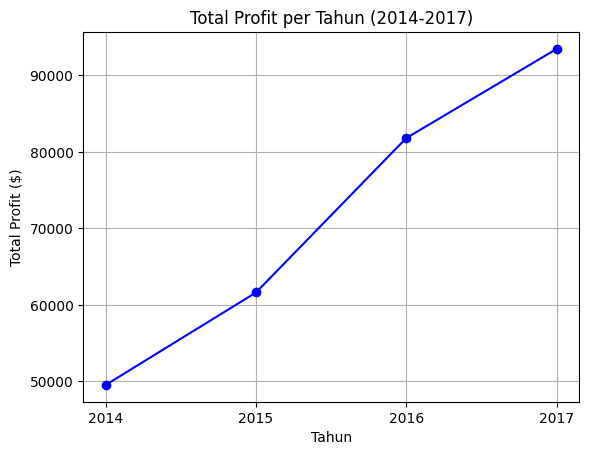

In [121]:
plt.plot(
    profit_per_tahun.index,
    profit_per_tahun.values, 
    marker="o", 
    linestyle="-", 
    color="b", 
)
plt.xlabel("Tahun")
plt.ylabel("Total Profit ($)")
plt.title("Total Profit per Tahun (2014-2017)")
plt.grid(True)
plt.xticks(profit_per_tahun.index)

In [122]:
print(profit_per_tahun)
print(f"Total Profit dari 2014-2017 $",profit_per_tahun.sum())

Year
2014    49543.9741
2015    61618.6037
2016    81795.1743
2017    93439.2696
Name: Profit, dtype: float64
Total Profit dari 2014-2017 $ 286397.0217


In [123]:
total_order_per_tahun = df.groupby('Year')['Order ID'].count()

In [124]:
total_order_per_tahun = total_order_per_tahun.loc[2014:2017]

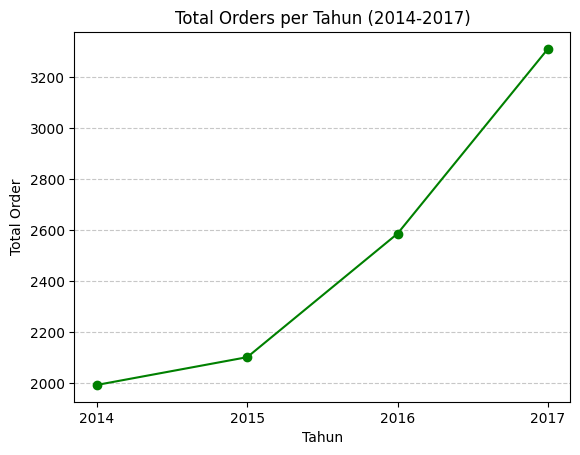

In [125]:
plt.plot(total_order_per_tahun.index,
        total_order_per_tahun.values,
        marker="o", 
        linestyle="-", 
        color="green")
plt.xlabel("Tahun")
plt.ylabel("Total Order")
plt.title("Total Orders per Tahun (2014-2017)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(total_order_per_tahun.index)

plt.show()

In [126]:
print(total_order_per_tahun)
print(f"Total Order dari 2014-2017 adalah",total_order_per_tahun.sum())

Year
2014    1993
2015    2102
2016    2587
2017    3312
Name: Order ID, dtype: int64
Total Order dari 2014-2017 adalah 9994


In [127]:
penjualan_pertahun = df.groupby("Year")["Sales"].sum()

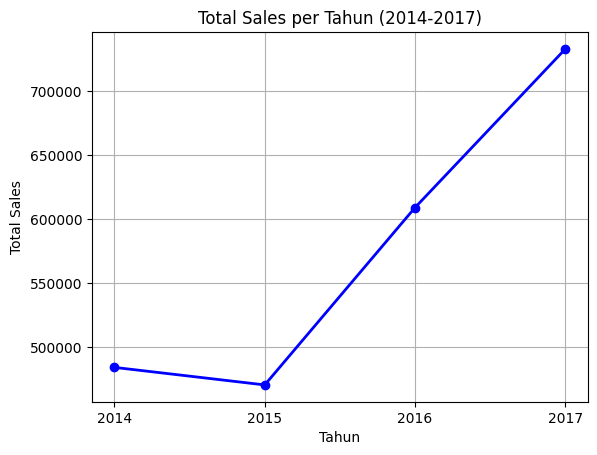

In [128]:
plt.plot(penjualan_pertahun.index, 
         penjualan_pertahun.values,
         marker='o',
         linestyle='-', 
         color='b', 
         linewidth=2)

# Tambahkan label
plt.xlabel("Tahun")
plt.ylabel("Total Sales")
plt.title("Total Sales per Tahun (2014-2017)")
plt.grid(True)
plt.xticks(penjualan_pertahun.index)

# Tampilkan grafik
plt.show()

In [129]:
print(penjualan_pertahun)
print(f"Total Sales dari tahun 2014-2017 adalah ",penjualan_pertahun.sum())

Year
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64
Total Sales dari tahun 2014-2017 adalah  2297200.8603


In [130]:
discount_per_tahun = df.groupby("Year")["Discount"].mean()

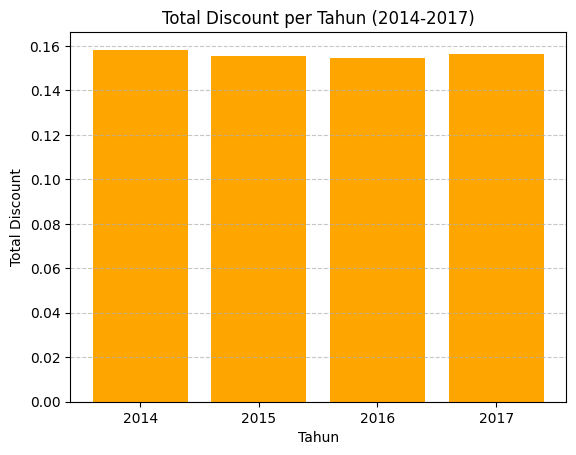

In [131]:
plt.bar(
    discount_per_tahun.index,
    discount_per_tahun.values, 
    color='orange'
)

# Tambahkan label
plt.xlabel("Tahun")
plt.ylabel("Total Discount")
plt.title("Total Discount per Tahun (2014-2017)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(discount_per_year.index)

# Tampilkan grafik
plt.show()

In [132]:
print(discount_per_tahun)
print(f"Rata rata diskon dari tahun 2014-2017 adalah ",discount_per_tahun.mean())

Year
2014    0.158284
2015    0.155609
2016    0.154743
2017    0.156467
Name: Discount, dtype: float64
Rata rata diskon dari tahun 2014-2017 adalah  0.156275818660744


### Pertanyaan 2:

Apakah terdapat pola kenaikan atau penurunan transaksi yang signifikan sepanjang tahun? 10123257 - Fazhrydzal Arya Pratama Sunandar

In [133]:
teransaksi_per_bulan = df.groupby(["Year", "Month"])["Order ID"].count().reset_index()

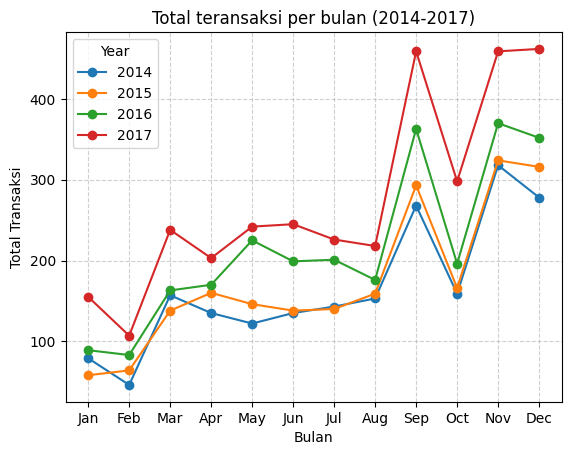

In [134]:
for year in range(2014, 2018):
    data = teransaksi_per_bulan[teransaksi_per_bulan["Year"] == year]
    plt.plot(
        data["Month"], 
        data["Order ID"], 
        marker='o',
        linestyle='-',
        label=f"{year}"
    )

# Tambahkan label
plt.xlabel("Bulan")
plt.ylabel("Total Transaksi")
plt.title("Total teransaksi per bulan (2014-2017)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.grid(True, linestyle="--", alpha=0.6)

# Tampilkan grafik
plt.show()

In [135]:
print(teransaksi_per_bulan)

    Year  Month  Order ID
0   2014      1        79
1   2014      2        46
2   2014      3       157
3   2014      4       135
4   2014      5       122
5   2014      6       135
6   2014      7       143
7   2014      8       153
8   2014      9       268
9   2014     10       159
10  2014     11       318
11  2014     12       278
12  2015      1        58
13  2015      2        64
14  2015      3       138
15  2015      4       160
16  2015      5       146
17  2015      6       138
18  2015      7       140
19  2015      8       159
20  2015      9       293
21  2015     10       166
22  2015     11       324
23  2015     12       316
24  2016      1        89
25  2016      2        83
26  2016      3       163
27  2016      4       170
28  2016      5       225
29  2016      6       199
30  2016      7       201
31  2016      8       176
32  2016      9       363
33  2016     10       196
34  2016     11       370
35  2016     12       352
36  2017      1       155
37  2017    

### Pertanyaan 3:

Jika perusahaan ingin meningkatkan profit pada tahun berikutnya, produk mana yang sebaiknya difokuskan untuk peningkatan penjualan berdasarkan data tahun 2014? - 10123260 - Ramdhan Husna A'liyasa

In [136]:
tahun = df[df['Year'] == 2014] #Filter tahun

In [137]:
# Menghitung total profit per produk
product_profit = tahun.groupby('Product Name')['Profit'].sum()
top_profitable = product_profit.nlargest(5)

# Mengambil dua kata pertama dari nama produk agar lebih singkat
top_profitable.index = top_profitable.index.str.split().str[:2].str.join(" ")

# Warna untuk tiap produk
warna_produk = ['red', 'blue', 'green', 'purple', 'orange']

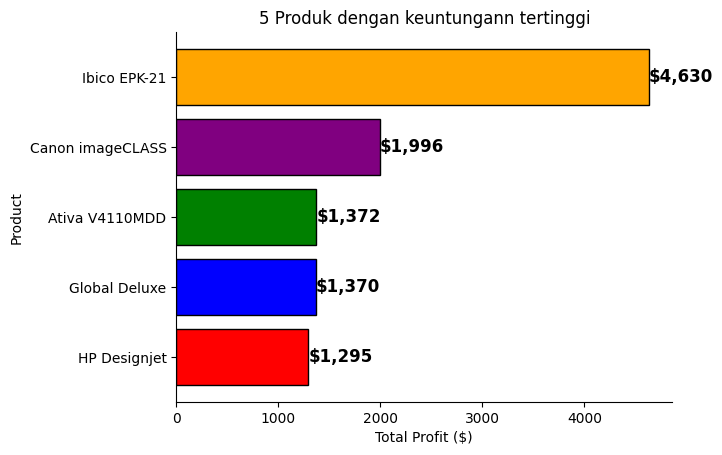

In [138]:
bars = plt.barh(
    top_profitable.index[::-1],
    top_profitable.values[::-1],
    color=warna_produk, 
    edgecolor="black"
)

# Tambahkan nilai di setiap batang
for bar in bars:
    plt.text(bar.get_width(), 
             bar.get_y() + bar.get_height()/2,
             f"${bar.get_width():,.0f}",
             va='center', 
             ha='left',
             fontsize=12,
             color='black', 
             fontweight='bold'
            )

# Konfigurasi tampilan
plt.xlabel("Total Profit ($)")
plt.ylabel("Product")
plt.title("5 Produk dengan keuntungann tertinggi")
plt.gca().spines[['top', 'right']].set_visible(False)  # Hilangkan border atas & kanan

# Tampilkan plot
plt.show()

In [139]:
print(top_profitable)

Product Name
Ibico EPK-21        4630.4755
Canon imageCLASS    1995.9900
Ativa V4110MDD      1371.9804
Global Deluxe       1369.8442
HP Designjet        1294.9926
Name: Profit, dtype: float64


### Pertanyaan 4:

Apakah terdapat periode tertentu di mana profit cenderung stabil atau mengalami tren kenaikan/penurunan yang signifikan?  - 10123231 - Frederick Agung Ezra Bandaso Jo

In [140]:
 df['Day'] = df['Order Date'].dt.day  

# Filter data untuk Januari 2014
january_2014 = df[(df['Year'] == 2014) & (df['Month'] == 1)]

# Menghitung total profit per hari (1-31)
daily_profit = january_2014.groupby('Day')['Profit'].sum()

# Pastikan semua hari dalam Januari (1-31) muncul di grafik
semua_hari = pd.Series(0, index=range(1, 32))  # Buat semua hari dengan default 0
daily_profit = semua_hari.add(daily_profit, fill_value=0)  # Gabungkan data

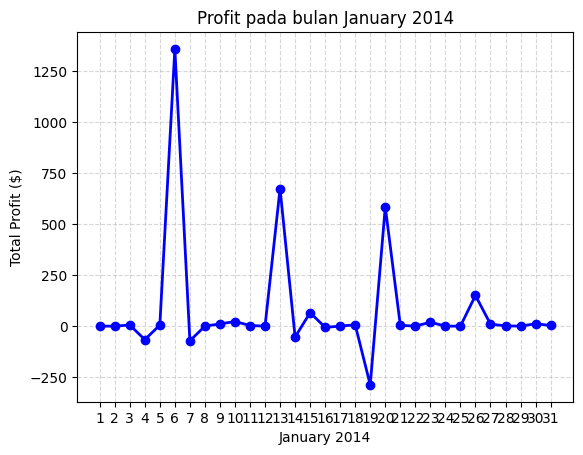

In [141]:
plt.plot(
    daily_profit.index,
    daily_profit.values,
    marker='o',
    linestyle='-', 
    color='b',
    linewidth=2
)

# Tambahkan label dan judul
plt.xlabel("January 2014")
plt.ylabel("Total Profit ($)")
plt.title("Profit pada bulan January 2014")
plt.xticks(range(1, 32))  # Set agar sumbu X dari 1-31
plt.grid(True, linestyle="--", alpha=0.5)

# Tampilkan grafik
plt.show()

In [142]:
print(daily_profit)

1        0.0000
2        0.0000
3        5.5512
4      -65.9901
5        4.8840
6     1358.0524
7      -71.9621
8        0.0000
9       10.9180
10      22.6537
11       3.0814
12       0.0000
13     673.6386
14     -53.2856
15      65.9780
16      -5.9335
17       0.0000
18       6.4864
19    -287.9976
20     584.3695
21       4.1028
22       0.0000
23      19.2384
24       0.0000
25       0.0000
26     150.3270
27       9.6827
28       1.3257
29       0.0000
30      11.6502
31       3.4196
dtype: float64


### Pertanyaan 5:

Seberapa sering terjadi hari dengan kerugian signifikan dalam sebulan pada tahun 2014? - 10123246 - Amantha Moammar Radja

In [143]:
# Filter data untuk tahun 2014 dan bulan Januari
df_jan_2014 = df[(df['Year'] == 2014) & (df['Month'] == 1) & (df['Profit'] < 0)]

# Hitung total kerugian per hari
daily_losses = df_jan_2014.groupby('Day')['Profit'].sum().reset_index()

# Ubah profit menjadi absolut (karena ini kerugian, kita tampilkan sebagai nilai positif)
daily_losses['Kerugian'] = daily_losses['Profit'].abs()

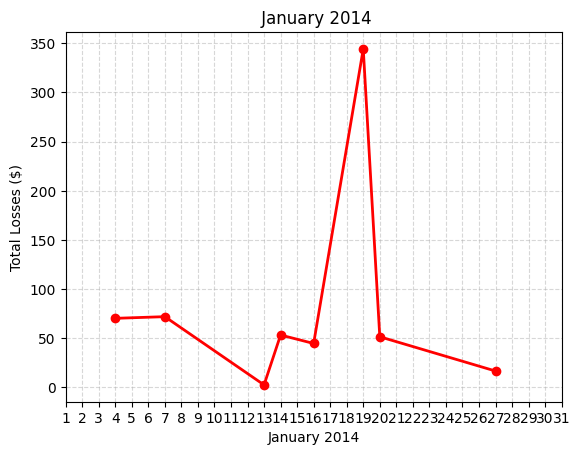

In [144]:
# Buat grafik garis
plt.plot(
    daily_losses['Day'], 
    daily_losses['Kerugian'],
    marker='o', 
    linestyle='-',
    color='r',
    linewidth=2
)

# Tambahkan label dan judul
plt.xlabel("January 2014")
plt.ylabel("Total Losses ($)")
plt.title(" January 2014")
plt.xticks(range(1, 32))  # Pastikan semua tanggal ditampilkan
plt.grid(True, linestyle="--", alpha=0.5)

# Tampilkan grafik
plt.show()

In [145]:
print(daily_losses)

   Day    Profit  Kerugian
0    4  -70.2618   70.2618
1    7  -71.9621   71.9621
2   13   -2.5212    2.5212
3   14  -53.2856   53.2856
4   16  -44.6812   44.6812
5   19 -344.3130  344.3130
6   20  -51.5154   51.5154
7   27  -16.6500   16.6500


#### Pertanyaan 6:

Jika perusahaan ingin mengurangi kerugian di tahun berikutnya, produk mana yang perlu mendapat perhatian lebih berdasarkan data tahun 2014? - 10123247 - Zulfa Rula Febrian

In [146]:
# Filter data untuk tahun 2014 dengan profit negatif (kerugian)
df_loss_2014 = df[(df['Year'] == 2014)]

# Hitung total kerugian per produk
product_losses = df_loss_2014.groupby('Product Name')['Profit'].sum()

# Ambil 10 produk dengan kerugian tertinggi
top_losses = product_losses.nsmallest(10)  # Menggunakan `nsmallest` karena profit negatif

# Warna untuk tiap produk
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6',
          '#c2f0c2','#f7c6c7','#ff6666','#c2f0f7']

# Memisahkan produk dengan kerugian terbesar dari chart
explode = [0.1] + [0] * 9  # Produk pertama (terbesar kerugiannya) dipisahkan

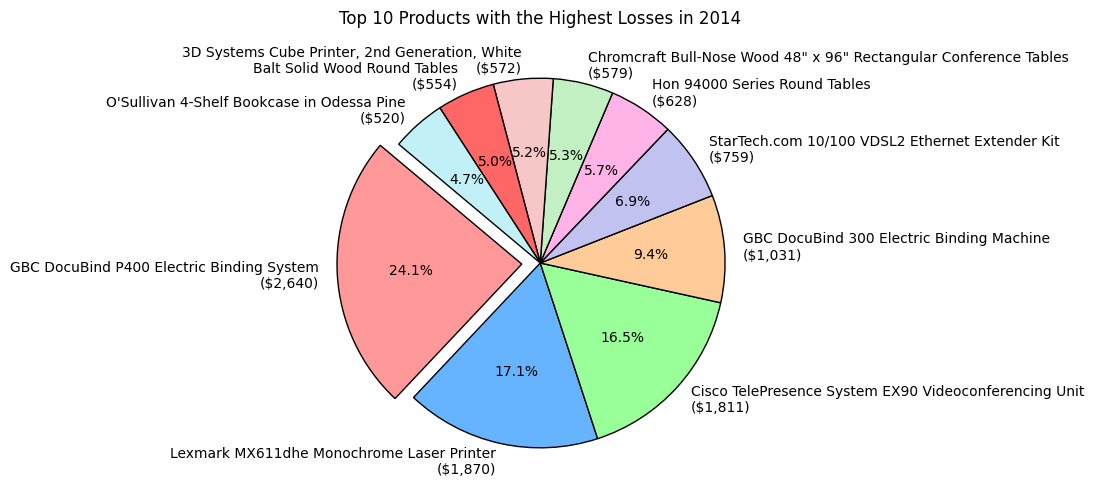

In [147]:
# Buat pie chart
plt.figure(figsize=(10, 6))
plt.pie(abs(top_losses), 
        labels=[f"{name}\n(${abs(val):,.0f})" for name, val in top_losses.items()],
        autopct='%1.1f%%', 
        colors=colors, 
        explode=explode,  # Memisahkan satu produk utama
        startangle=140, 
        wedgeprops={'edgecolor': 'black'})

# Tambahkan judul
plt.title("Top 10 Products with the Highest Losses in 2014")

# Tampilkan chart
plt.show()

#### Pertanyaan 7:

Bagaimana distribusi kuantitas penjualan di seluruh negara bagian Amerika Serikat? - 10123247 - Zulfa Rula Febrian

In [149]:
# Menghitung total penjualan per state
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

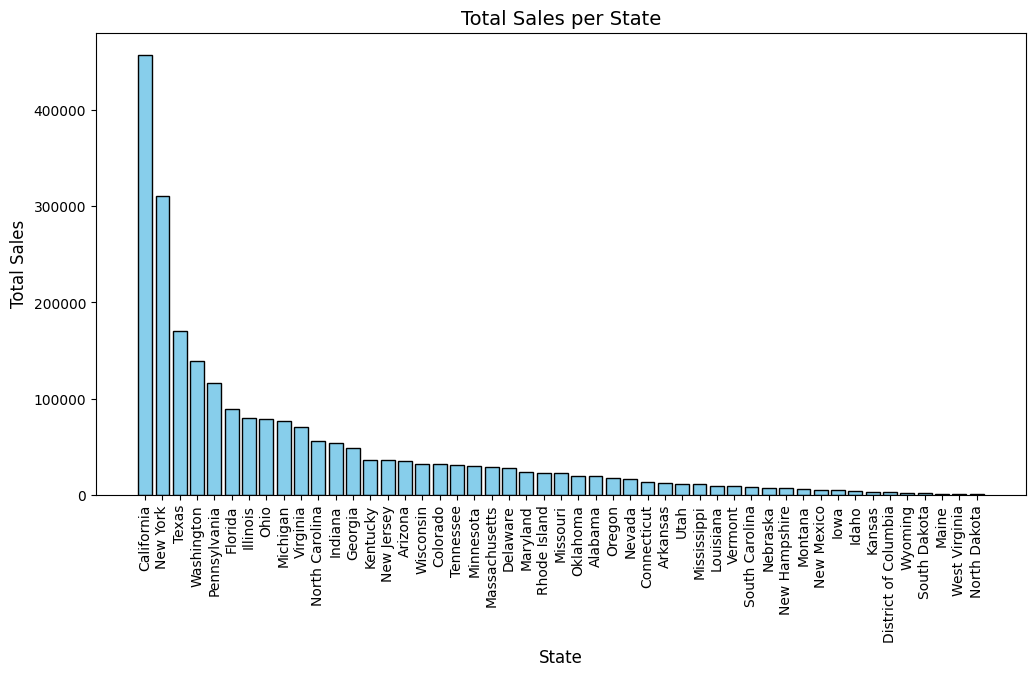

In [150]:
# Membuat grafik batang
plt.figure(figsize=(12, 6))
plt.bar(
    state_sales.index,
    state_sales.values,
    color='skyblue',
    edgecolor='black'
)

# Menambahkan label dan judul
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Total Sales per State", fontsize=14)
plt.xticks(rotation=90)  # Putar label sumbu X agar terbaca dengan jelas

# Menampilkan grafik
plt.show()

In [151]:
print(state_sales)

State
California              457687.6315
New York                310876.2710
Texas                   170188.0458
Washington              138641.2700
Pennsylvania            116511.9140
Florida                  89473.7080
Illinois                 80166.1010
Ohio                     78258.1360
Michigan                 76269.6140
Virginia                 70636.7200
North Carolina           55603.1640
Indiana                  53555.3600
Georgia                  49095.8400
Kentucky                 36591.7500
New Jersey               35764.3120
Arizona                  35282.0010
Wisconsin                32114.6100
Colorado                 32108.1180
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27451.0690
Maryland                 23705.5230
Rhode Island             22627.9560
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

## Conclusion